In [644]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [646]:
df = pd.read_csv("/Users/eden_zoo/Desktop/CMTH119 Introduction to Big Data/Final Project/project_datasets/customer_churn/churn.csv")

## Data Preparation

In [647]:
# find categorical variable which data type is 'O' form dictionary
dict(df.dtypes)

{'State': dtype('O'),
 'Account Length': dtype('int64'),
 'Area Code': dtype('int64'),
 'Phone': dtype('O'),
 "Int'l Plan": dtype('O'),
 'VMail Plan': dtype('O'),
 'VMail Message': dtype('int64'),
 'Day Mins': dtype('float64'),
 'Day Calls': dtype('int64'),
 'Day Charge': dtype('float64'),
 'Eve Mins': dtype('float64'),
 'Eve Calls': dtype('int64'),
 'Eve Charge': dtype('float64'),
 'Night Mins': dtype('float64'),
 'Night Calls': dtype('int64'),
 'Night Charge': dtype('float64'),
 'Intl Mins': dtype('float64'),
 'Intl Calls': dtype('int64'),
 'Intl Charge': dtype('float64'),
 'CustServ Calls': dtype('int64'),
 'Churn?': dtype('O')}

In [648]:
df.describe()
df.shape

df.isnull().sum()
df.isna().sum()
df[df.duplicated()]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?


### Plot for column 'churn' and get churn rate.

False.    2850
True.      483
Name: Churn?, dtype: int64


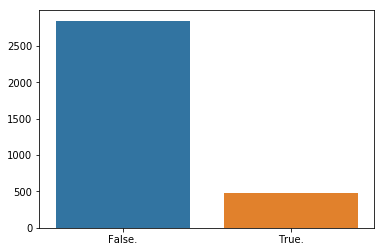

In [649]:
y = df['Churn?'].value_counts()
print(y)
sns.barplot(y.index, y.values)

In [650]:
churn_rate = (y[1] / df.shape[0])*100
print('Churn Rate:', churn_rate)

Churn Rate: 14.491449144914492


### Label Encoding for Categorical Variables

In [651]:
df = df.drop(['Phone'], axis = 1)

categorical = [i for i in dict(df.dtypes) if dict(df.dtypes)[i] in ['O']]
categorical.append('Area Code')
print('The categorical variables are :\n\n', categorical)

df_numerical=df.drop(categorical,axis=1)
numerical = [i for i in dict(df.dtypes) if dict(df.dtypes)[i]!='O']
numerical.remove('Area Code')
print('The numerical variables are :\n\n', numerical)

The categorical variables are :

 ['State', "Int'l Plan", 'VMail Plan', 'Churn?', 'Area Code']
The numerical variables are :

 ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']


In [665]:
le = preprocessing.LabelEncoder()
for i in categorical: 
    le.fit(df[i])
    df[i] = le.transform(df[i])
df.head(5)

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [666]:
df['State'].unique()

array([16, 35, 31, 36,  1, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 46, 45,
       43,  9,  5,  3, 40, 29, 50, 11, 14, 30, 10,  0, 20,  2, 48, 37, 22,
        8, 44,  4, 23, 41, 27, 47, 32, 33,  7, 17, 21, 25, 42, 38,  6, 28])

### Correlation Matrix

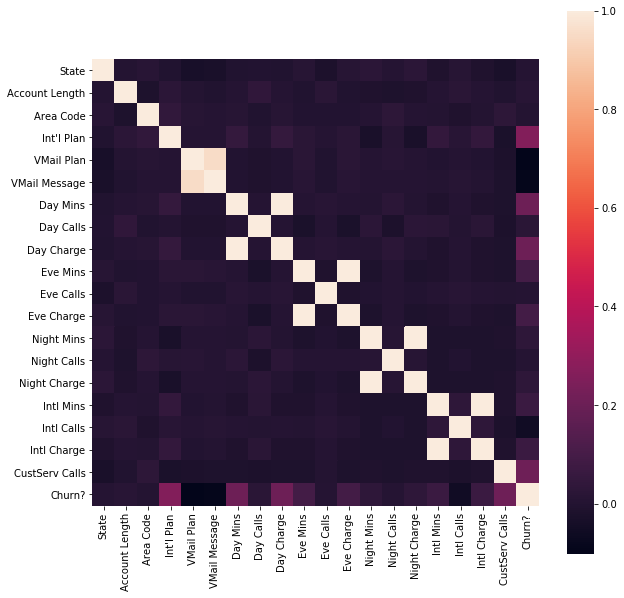

In [668]:
fig = plt.figure(figsize=(10,10))
corr = df.corr(method = 'pearson')
# plot
sns.heatmap(corr, vmax = 1, square = True)

## Develop Classification Models - Decision Tree versus Gaussian Naive Bayes

Split dataset into training set and test set

In [679]:
x=df.drop(['Churn?'],axis=1)
feature = df[df.columns[df.columns != 'Churn?']]
y=df['Churn?']

In [680]:
#X_train, X_test, y_train, y_test = train_test_split(, df['Churn?'],, test_size = 0.3,  stratify = y, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(x,df['Churn?'], test_size = 0.2,stratify = y,random_state = 1)

In [681]:
X_train.shape, X_test.shape

((2666, 19), (667, 19))

In [684]:
#decision tree
feature = df[df.columns[df.columns != 'Churn?']]
# 70% training and 30% test, *random_state = 1*, stratified

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
decisiontree_baseline = tree.plot_tree(clf, 
                              feature_names = df.columns[df.columns != 'Churn?'], 
                              class_names= ["0", "1"],
                              filled=True)
plt.savefig("decistion_tree_baseline.pdf")

y_pred_train_dt_bl= clf.predict(X_train)
y_pred_test_dt_bl= clf.predict(X_test)

cf_dt_bl = sk.metrics.confusion_matrix(y_test, y_pred_test_dt_bl)
print(cf_dt_bl)
tn, fp, fn, tp=cf_dt_bl.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_dt_bl)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_dt_bl)))
precision = tp / float(tp + fp)
print('Precision : {0:0.4f}'.format(precision))
recall = tp / float(tp + fn)
print('Recall : {0:0.4f}'.format(recall))
f1score= 2*precision*recall/(precision+recall)
print('f1score : {0:0.4f}'.format(f1score))

print(classification_report(y_test, y_pred_test_dt_bl))

[[532  38]
 [ 26  71]]
TP:  71 , FP:  38 , TN:  532 , FN: 26
Training-set accuracy score: 1.0000
Model accuracy score: 0.9040
Precision : 0.6514
Recall : 0.7320
f1score : 0.6893
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       570
           1       0.65      0.73      0.69        97

    accuracy                           0.90       667
   macro avg       0.80      0.83      0.82       667
weighted avg       0.91      0.90      0.91       667



Feature Selection by Feature Importance


print(clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=df.columns[df.columns != 'Churn?'])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##Feature Selection by Correlation Matrix
fig = plt.figure(figsize=(10,10))
corr = df.corr(method = 'pearson')
# plot
sns.heatmap(corr, vmax = 1, square = True)

# Considering top 10 important features and correlation heatmap, we pick Day Charge, Eve Mins, Intl Calls, Int'l Plan, CustServ Calls, VMail Message, and Night Mins. 
# vnvvvfvccv  fgbg  ttttttt ttttt gBJJ
feature_adv = df[["Day Charge", "Eve Mins","Int'l Plan", "CustServ Calls","Intl Calls","Intl Mins","VMail Plan","Day Calls"]]


In [678]:
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(feature_adv, y, stratify=y, test_size=0.2,random_state = 1)


clf_adv = tree.DecisionTreeClassifier()
clf_adv = clf_adv.fit(X_train_adv, y_train_adv)

fig = plt.figure(figsize=(25,20))
decisiontree_baseline = tree.plot_tree(clf, 
                              feature_names = df.columns[df.columns != 'Churn?'], 
                              class_names= ["0", "1"],
                              filled=True)
plt.savefig("decistion_tree_advanced.pdf")

y_pred_train_dt_adv= clf_adv.predict(X_train_adv)
y_pred_test_dt_adv= clf_adv.predict(X_test_adv)

cf_adv = sk.metrics.confusion_matrix(y_test_adv, y_pred_test_dt_adv)
print(cf_adv)
tn_dt_adv, fp_dt_adv, fn_dt_adv, tp_dt_adv=cf_adv.ravel()
print ("TP: ", tp_dt_adv,", FP: ", fp_dt_adv,", TN: ", tn_dt_adv,", FN:", fn_dt_adv)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_adv, y_pred_train_dt_adv)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_adv, y_pred_test_dt_adv)))
precision_dt_adv = tp_dt_adv / float(tp_dt_adv + fp_dt_adv)
print('Precision : {0:0.4f}'.format(precision_dt_adv))
recall_dt_adv = tp_dt_adv / float(tp_dt_adv + fn_dt_adv)
print('Recall : {0:0.4f}'.format(recall_dt_adv))
f1score_dt_adv= 2*precision_dt_adv*recall_dt_adv/(precision_dt_adv+recall_dt_adv)
print('f1score : {0:0.4f}'.format(f1score_dt_adv))

print(classification_report(y_test_adv, y_pred_test_dt_adv))

[[527  43]
 [ 28  69]]
TP:  69 , FP:  43 , TN:  527 , FN: 28
Training-set accuracy score: 1.0000
Model accuracy score: 0.8936
Precision : 0.6161
Recall : 0.7113
f1score : 0.6603
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       570
           1       0.62      0.71      0.66        97

    accuracy                           0.89       667
   macro avg       0.78      0.82      0.80       667
weighted avg       0.90      0.89      0.90       667



Develop Gaussian Naive Bayes Classification Model

In [709]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)
X_train.shape, y_train.shape

# from sklearn.inspection import permutation_importance
# imps = permutation_importance(NBmodel, X_test, y_test)
# print(imps.importances_mean)


((2666, 19), (2666,))

In [710]:
y_pred_train_nb_bl = NBmodel.predict(X_train)
y_pred_test_nb_bl = NBmodel.predict(X_test)

In [688]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_nb_bl)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_nb_bl)))

Training-set accuracy score: 0.8710
Model accuracy score: 0.8501


In [711]:
cf_nb= sk.metrics.confusion_matrix(y_test, y_pred_test_nb_bl)
print(cf_nb)
tn_nb_bl, fp_nb_bl, fn_nb_bl, tp_nb_bl=cf_nb.ravel()

print ("TP: ", tp_nb_bl,", FP: ", fp_nb_bl,", TN: ", tn_nb_bl,", FN:", fn_nb_bl)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_nb_bl)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_nb_bl)))
precision_nb_bl = tp_nb_bl / float(tp_nb_bl + fp_nb_bl)
print('Precision : {0:0.4f}'.format(precision_nb_bl))
recall_dt_adv = tp_nb_bl / float(tp_nb_bl + fn_nb_bl)
print('Recall : {0:0.4f}'.format(recall_nb_bl))
f1score_dt_adv= 2*precision_nb_bl*recall_nb_bl/(precision_nb_bl+recall_nb_bl)
print('f1score : {0:0.4f}'.format(f1score_nb_bl))

print(classification_report(y_test, y_pred_test_nb_bl))

[[524  46]
 [ 54  43]]
TP:  43 , FP:  46 , TN:  524 , FN: 54
Training-set accuracy score: 0.8710
Model accuracy score: 0.8501
Precision : 0.4831
Recall : 0.4433
f1score : 0.4624
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       570
           1       0.48      0.44      0.46        97

    accuracy                           0.85       667
   macro avg       0.69      0.68      0.69       667
weighted avg       0.84      0.85      0.85       667



In [693]:
null_accuracy = (855/1000)

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8550


In [694]:
#The model accuracy is 0.85. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
#We can see that the null accuracy score is 0.8550, very close to the model accuracy So, we can conclude that either Gaussian Naive Bayes Classification model
#is not doing a good job in predicting the class labels, or accuracy is not a good measure in this case.
#Considering the imbalanceness in calss labels in the dataset, we choose to use recall and precision to evaluate data instead.


In [697]:
#f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [715]:
NBmodel_adv = GaussianNB()
NBmodel_adv.fit(X_train_adv, y_train_adv)

y_pred_train_nb_adv = NBmodel_adv.predict(X_train_adv)
y_pred_test_nb_adv = NBmodel_adv.predict(X_test_adv)
y_pred_train_nb_adv
y_pred_test_nb_adv

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_adv, y_pred_train_nb_adv)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_adv, y_pred_test_nb_adv)))

cf_nb_adv= sk.metrics.confusion_matrix(y_test_adv, y_pred_test_nb_adv)
print(cf_nb_adv)
tn_nb_adv, fp_nb_adv, fn_nb_adv, tp_nb_adv=cf_nb.ravel()
print ("TP: ", tp_nb_adv,", FP: ", fp_nb_adv,", TN: ", tn_nb_adv,", FN:", fn_nb_adv)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_nb_adv)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_nb_adv)))

precision_nb_adv = tp_nb_adv / float(tp_nb_adv + fp_nb_adv )
print('Precision : {0:0.4f}'.format(precision_nb_adv))
recall_nb_adv = tp_nb_adv / float(tp_nb_adv + fn_nb_adv)
print('Recall : {0:0.4f}'.format(recall_nb_adv))
f1score_nb_adv= 2*precision_nb_adv*recall_nb_adv/(precision_nb_adv+recall_nb_adv)
print('f1score : {0:0.4f}'.format(f1score_nb_adv))


print(classification_report(y_test_adv, y_pred_test_nb_adv))

Training-set accuracy score: 0.8496
Model accuracy score: 0.8441
[[524  46]
 [ 58  39]]
TP:  43 , FP:  46 , TN:  524 , FN: 54
Training-set accuracy score: 0.8496
Model accuracy score: 0.8441
Precision : 0.4831
Recall : 0.4433
f1score : 0.4624
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       570
           1       0.46      0.40      0.43        97

    accuracy                           0.84       667
   macro avg       0.68      0.66      0.67       667
weighted avg       0.84      0.84      0.84       667

